In [1]:
import pyart
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks 
from datetime import date
from datetime import time
from datetime import timedelta
import pandas as pd

import warnings
import glob
import gc
import copy
import os
import scipy as scipy

import sys
base_path = '/gws/nopw/j04/'
sys.path.append(os.path.join(base_path,'ncas_radar_vol1/lindsay/bin/'))

import calib_functions

%matplotlib inline

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [2]:
datadir = os.path.join(base_path,'ncas_radar_vol2/data/xband/raine/calibrations/ZDRcalib/horz/')
outdir = os.path.join(datadir, 'images/')
if not os.path.exists(outdir):
    os.makedirs(outdir)

filelist = glob.glob(datadir + '*.csv')
filelist.sort()

all_data = pd.DataFrame()
#zdr_med=pd.DataFrame()
zdr_med=[]

for f in range(0,len(filelist)):
    file = filelist[f]

    data = pd.read_csv(file,index_col=0, parse_dates=True)
#    zdr_med = data['ZDR'].median()
    all_data = pd.concat([all_data, data])


In [3]:
zdr_med = all_data.resample('D').median()
zdr_std = all_data.resample('D').std()

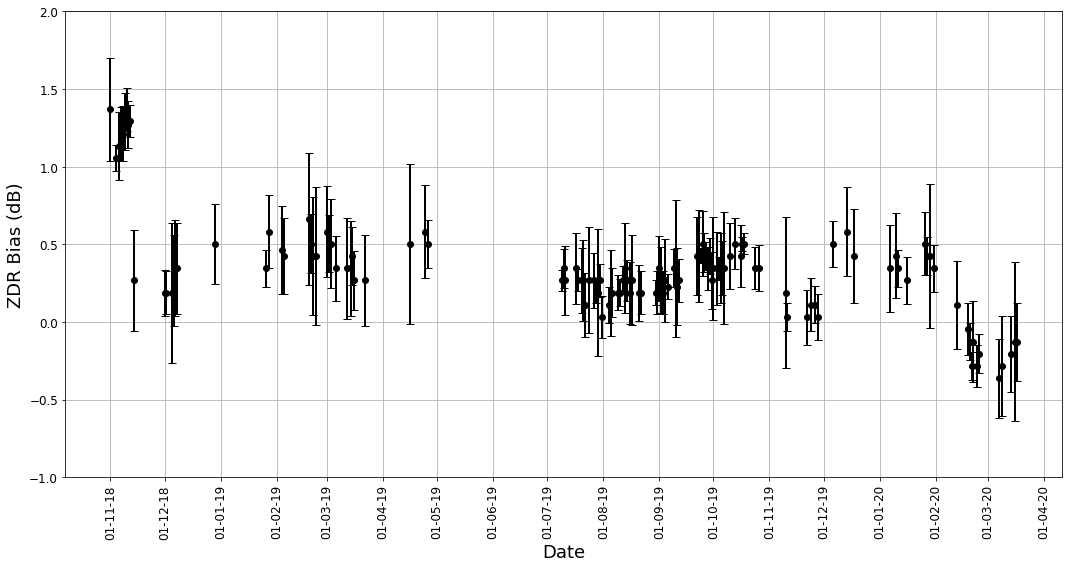

In [4]:
plt.figure(figsize=(15,8))
#plt.plot(all_data.index,all_data['ZDR'],'kx')
#plt.plot(zdr_med.index,zdr_med['ZDR'],'rx',mew=1)

plt.errorbar(zdr_med.index,zdr_med['ZDR'],yerr=zdr_std['ZDR'],color='black',fmt='o',
             markersize='6', elinewidth=2,capsize=4)

plt.yticks(size=12)
plt.xticks(size=12)
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=90)
plt.ylim([-1, 2])

plt.ylabel('ZDR Bias (dB)', fontsize=18)
plt.xlabel('Date', fontsize=18)

plt.tight_layout()

#Save plot
#img_name = os.path.join(outdir,'full_horz_zdr_raine.png')
#plt.savefig(img_name,dpi=150)
#plt.close()

In [21]:
print np.nanmedian(all_data.loc['2018-10-30':'2018-11-13']['ZDR']), np.nanstd(all_data.loc['2018-10-30':'2018-11-13']['ZDR'])
print np.nanmedian(all_data.loc['2018-11-14':'2020-02-01']['ZDR']), np.nanstd(all_data.loc['2018-11-14':'2020-02-01']['ZDR'])
print np.nanmedian(all_data.loc['2020-02-16':'2020-04-01']['ZDR']), np.nanstd(all_data.loc['2020-02-16':'2020-04-01']['ZDR'])

1.251968502998352 0.19878160023065689
0.3464567065238953 0.2604797402668869
-0.20472441613674164 0.262610054978699


In [19]:
print outdir


/nfs/foe-data-32/export/ncas/earljbe/mount/ncas_radar_vol2/calibrations/ZDRcalib/horz/images/
